In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [160]:
df = pd.read_csv("Depression_Dataset_1.csv", encoding='latin1')
df.head()

,ï»¿,target,TweetText
0,541200,0,@Nkluvr4eva My poor little dumpling In Holmde...
1,750,0,I'm off too bed. I gotta wake up hella early t...
2,766711,0,I havent been able to listen to it yet My spe...
3,285055,0,now remembers why solving a relatively big equ...
4,705995,0,"Ate too much, feel sick"


## Viewing Dataset

In [161]:
df.shape

(39727, 3)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39727 entries, 0 to 39726
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ï»¿        39727 non-null  int64 
 1   target     39727 non-null  int64 
 2   TweetText  39727 non-null  object
dtypes: int64(2), object(1)
memory usage: 931.2+ KB


In [163]:
df.describe()

,ï»¿,target
count,3.972700e+04,39727.000000
mean,6.976943e+05,1.484230
std,4.483727e+05,1.932376
min,2.300000e+01,0.000000
25%,3.214510e+05,0.000000
50%,6.403670e+05,0.000000
75%,1.057002e+06,4.000000
max,1.599959e+06,4.000000


In [164]:
df.isnull().sum()

ï»¿          0
target       0
TweetText    0
dtype: int64

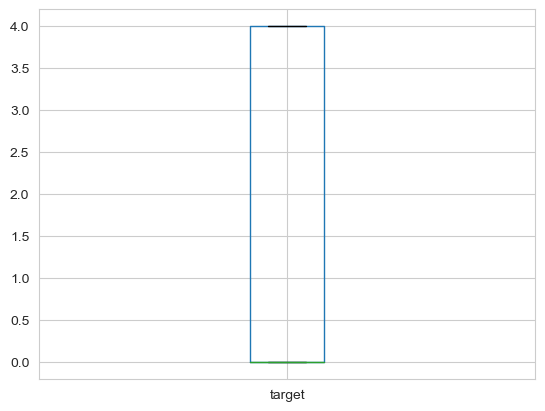

In [165]:
df.boxplot(column='target')
plt.show()

In [166]:
data_target=df.groupby('target')

In [167]:
df['target'].value_counts()

0    24986
4    14741
Name: target, dtype: int64

0    24986
4    14741
Name: target, dtype: int64


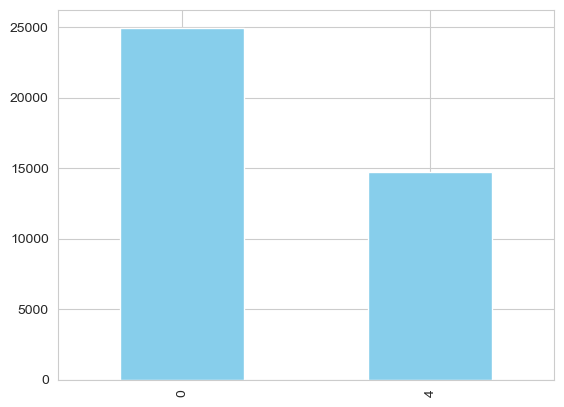

In [168]:
print(df.target.value_counts())
df.target.value_counts().plot(kind="bar", color="skyblue")
plt.show()

In [169]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
import string
import warnings

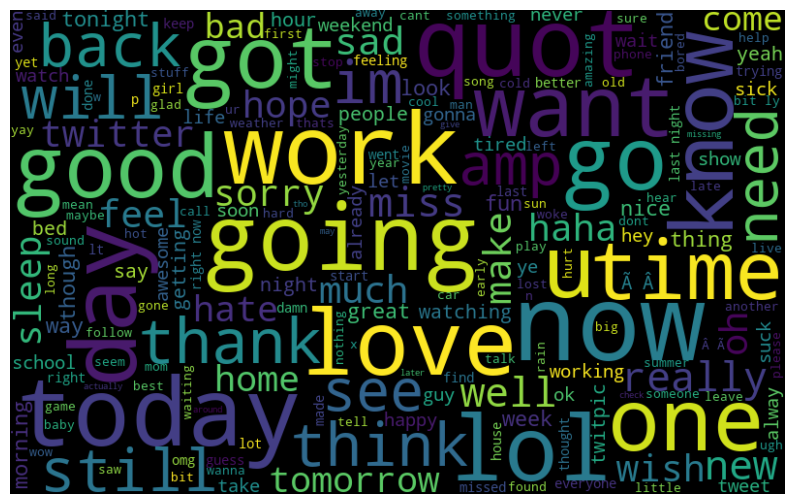

In [170]:
all_words = ' '.join([text for text in df['TweetText']])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

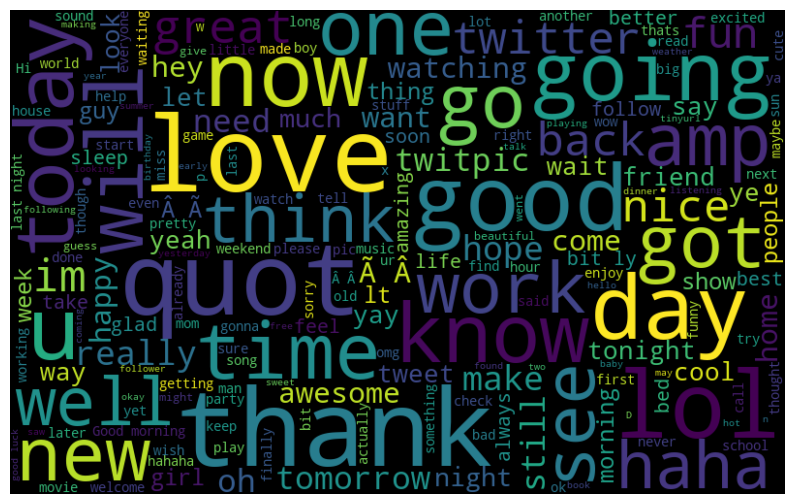

In [171]:
positive_words = ' '.join([text for text in df['TweetText'][df['target']==4]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

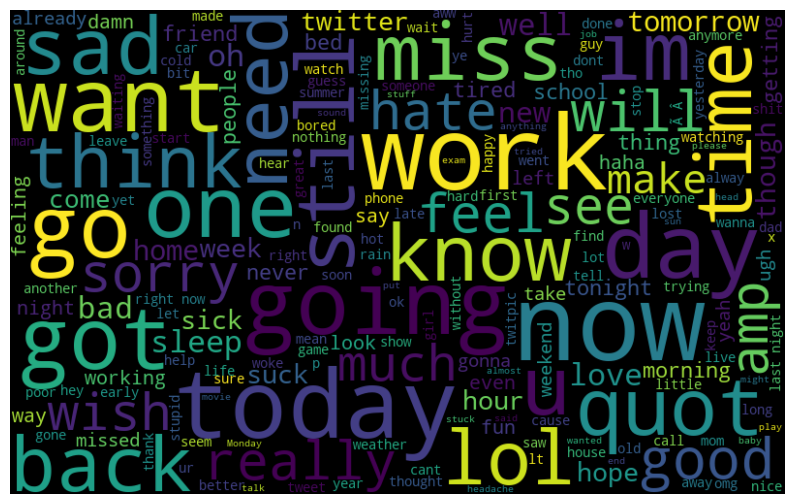

In [172]:
negative_words = ' '.join([text for text in df['TweetText'][df['target']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

## Data PreProcessing

In [173]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
# Removing Twitter Handles (@user)
df['TweetText'] = df['TweetText'].str.replace("@", "") 
# Removing links
df['TweetText'] = df['TweetText'].str.replace(r"http\S+", "") 
# Removing Punctuations, Numbers, and Special Characters
df['TweetText'] = df['TweetText'].str.replace("[^a-zA-Z]", " ") 
# Remove stop words

In [176]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [177]:
df['TweetText'] = df['TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

,ï»¿,target,TweetText
0,541200,0,nkluvr eva poor little dumpling holmdel vids r...
1,750,0,bed gotta wake hella early tomorrow morning
2,766711,0,havent able listen yet speakers busted
3,285055,0,remembers solving relatively big equation two ...
4,705995,0,ate much feel sick


In [178]:
# Text Tokenization and Normalization
df['TweetText'] = df['TweetText'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

# Tokenize the text
df['TweetText'] = df['TweetText'].apply(nltk.word_tokenize)

In [179]:
df.head()

,ï»¿,target,TweetText
0,541200,0,"[nkluvr, eva, poor, little, dumpling, holmdel,..."
1,750,0,"[bed, got, ta, wake, hella, early, tomorrow, m..."
2,766711,0,"[havent, able, listen, yet, speakers, busted]"
3,285055,0,"[remembers, solving, relatively, big, equation..."
4,705995,0,"[ate, much, feel, sick]"


In [180]:
# Now let’s stitch these tokens back together
df['TweetText'] = df['TweetText'].apply(lambda x: ' '.join([w for w in x]))
# Removing small words
df['TweetText'] = df['TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,ï»¿,target,TweetText
0,541200,0,nkluvr poor little dumpling holmdel vids reall...
1,750,0,wake hella early tomorrow morning
2,766711,0,havent able listen speakers busted
3,285055,0,remembers solving relatively equation unknowns...
4,705995,0,much feel sick


## Sentiment Analysis

In [181]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [182]:
# Lemmatization (to group similar words together)
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [183]:
# tokenize each word
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KHUSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [184]:
df["tokens"] = df["TweetText"].apply(lambda x: TextBlob(x).words)

In [185]:
df["TweetText"] = df["TweetText"].apply(lambda x: " ".join([Word(x).lemmatize()]))

In [186]:
df.head()

,ï»¿,target,TweetText,tokens
0,541200,0,nkluvr poor little dumpling holmdel vids reall...,"[nkluvr, poor, little, dumpling, holmdel, vids..."
1,750,0,wake hella early tomorrow morning,"[wake, hella, early, tomorrow, morning]"
2,766711,0,havent able listen speakers busted,"[havent, able, listen, speakers, busted]"
3,285055,0,remembers solving relatively equation unknowns...,"[remembers, solving, relatively, equation, unk..."
4,705995,0,much feel sick,"[much, feel, sick]"


In [187]:
# Applying sentiment to entire dataset

blob_emptylist = []

for i in df["TweetText"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [188]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df1 = pd.DataFrame(blob_emptylist)
df1.head()

,polarity,subjectivity
0,-0.169792,0.460417
1,0.100000,0.300000
2,0.500000,0.625000
3,0.000000,0.375000
4,-0.257143,0.528571


In [189]:
# Combine both data1 and df1
df3 = pd.concat([df.reset_index(drop=True), df1], axis=1)
df3.head()

,ï»¿,target,TweetText,tokens,polarity,subjectivity
0,541200,0,nkluvr poor little dumpling holmdel vids reall...,"[nkluvr, poor, little, dumpling, holmdel, vids...",-0.169792,0.460417
1,750,0,wake hella early tomorrow morning,"[wake, hella, early, tomorrow, morning]",0.100000,0.300000
2,766711,0,havent able listen speakers busted,"[havent, able, listen, speakers, busted]",0.500000,0.625000
3,285055,0,remembers solving relatively equation unknowns...,"[remembers, solving, relatively, equation, unk...",0.000000,0.375000
4,705995,0,much feel sick,"[much, feel, sick]",-0.257143,0.528571


In [190]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['TweetText','tokens','polarity']]
df4.head()

,TweetText,tokens,polarity
0,nkluvr poor little dumpling holmdel vids reall...,"[nkluvr, poor, little, dumpling, holmdel, vids...",-0.169792
1,wake hella early tomorrow morning,"[wake, hella, early, tomorrow, morning]",0.100000
2,havent able listen speakers busted,"[havent, able, listen, speakers, busted]",0.500000
3,remembers solving relatively equation unknowns...,"[remembers, solving, relatively, equation, unk...",0.000000
4,much feel sick,"[much, feel, sick]",-0.257143


In [191]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,TweetText,tokens,polarity,Sentiment
0,nkluvr poor little dumpling holmdel vids reall...,"[nkluvr, poor, little, dumpling, holmdel, vids...",-0.169792,Negative
1,wake hella early tomorrow morning,"[wake, hella, early, tomorrow, morning]",0.100000,Positive
2,havent able listen speakers busted,"[havent, able, listen, speakers, busted]",0.500000,Positive
3,remembers solving relatively equation unknowns...,"[remembers, solving, relatively, equation, unk...",0.000000,Positive
4,much feel sick,"[much, feel, sick]",-0.257143,Negative


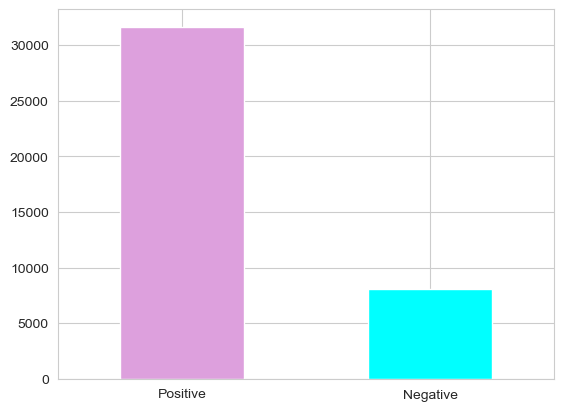

In [192]:
result = df4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [193]:
df4.groupby("Sentiment").count()

,TweetText,tokens,polarity
Sentiment,,,
Negative,8083,8083,8083
Positive,31644,31644,31644


In [194]:
df4.groupby("polarity").max().head() 
# returns the tweets with maximum polarity i.e. most negative tweets

,TweetText,tokens,Sentiment
polarity,,,
-1.000000,zyklonic showers evil,"[zyklonic, showers, evil]",Negative
-0.900000,weather australia bloody miserable slid bike s...,"[weather, australia, bloody, miserable, slid, ...",Negative
-0.900000,worst pain everrrr stupid wisdom teeth ugggghhhh,"[worst, pain, everrrr, stupid, wisdom, teeth, ...",Negative
-0.875000,studying chemistry brutal,"[studying, chemistry, brutal]",Negative
-0.866667,stupidnguyen well soon school boring crap hate...,"[stupidnguyen, well, soon, school, boring, cra...",Negative


Text(0.5, 1.0, 'Polarity Distribution')

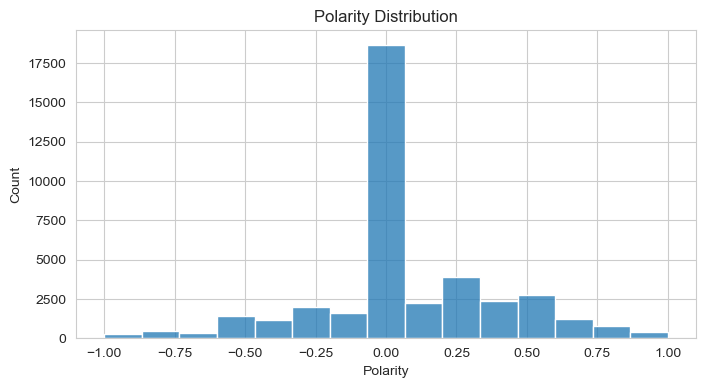

In [195]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

In [196]:
# check to see if data is balanced
df4['Sentiment'].value_counts()

Positive    31644
Negative     8083
Name: Sentiment, dtype: int64

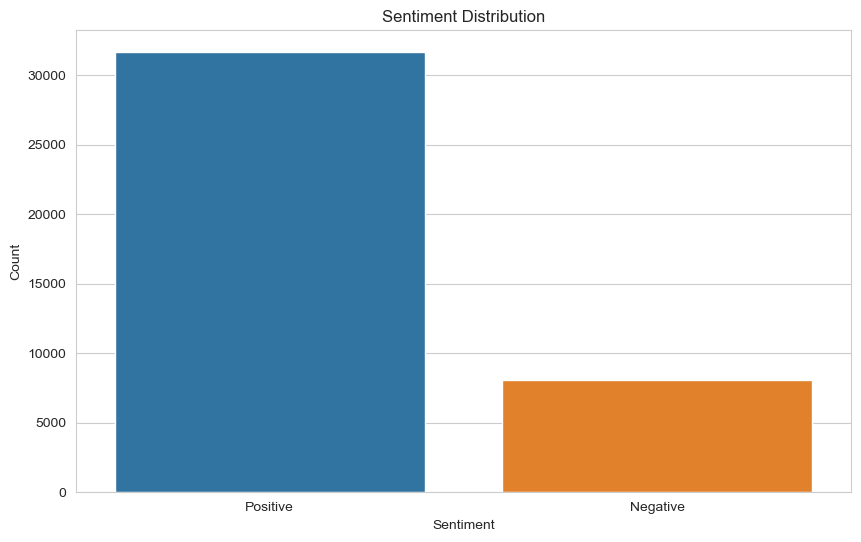

In [197]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

## Train Test Split

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [201]:
documents = stopwords.words()

cv = CountVectorizer(max_features = 1420)
X = cv.fit_transform(documents).toarray()
Y = df4['Sentiment']

In [203]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (10405, 1420)
Shape of Y: (39727,)


In [202]:
# split the data into test and train set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [10405, 39727]

In [115]:
#X_train_sparse = pd.DataFrame(X_train.toarray()) 

In [116]:
#X_train_sparse

,0,1,2,3,4,5,6,7,8,9,...,41996,41997,41998,41999,42000,42001,42002,42003,42004,42005
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
Y_train

28375    Negative
6921     Positive
2498     Positive
13857    Positive
11641    Positive
           ...   
6265     Negative
11284    Positive
38158    Positive
860      Positive
15795    Positive
Name: Sentiment, Length: 31781, dtype: object

In [157]:
Y_test

1670     Positive
29091    Positive
5657     Positive
8420     Negative
6527     Positive
           ...   
9595     Positive
18403    Positive
36085    Positive
7317     Positive
37093    Positive
Name: Sentiment, Length: 7946, dtype: object

In [109]:
X_test

<7946x42006 sparse matrix of type '<class 'numpy.float64'>'
	with 47679 stored elements in Compressed Sparse Row format>

## Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
dtc_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, dtc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9463881198087087


In [47]:
# Create a classification report
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.84      0.90      0.87      1557
    Positive       0.98      0.96      0.97      6389

    accuracy                           0.95      7946
   macro avg       0.91      0.93      0.92      7946
weighted avg       0.95      0.95      0.95      7946



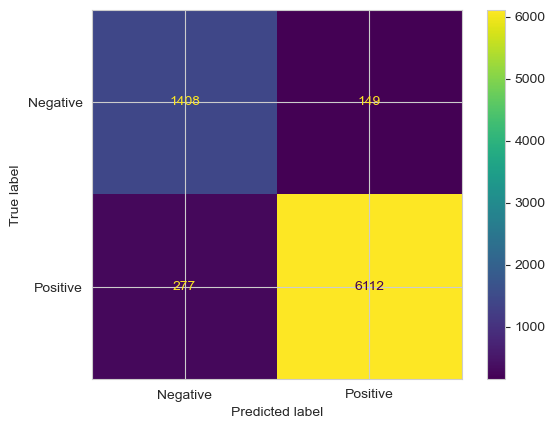

In [48]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, dtc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot() 

In [49]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(dtc.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(dtc.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 94.64 %


## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Evaluate the classifier on the testing set
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9548200352378555


In [53]:
# Get the accuracy score of the model
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(rfc.predict(X_test), y_test)*100,2),'%')

The accuracy of the Random Forest Classifier is 95.48 %


In [54]:
# Create a classification report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.87      0.90      0.89      1557
    Positive       0.98      0.97      0.97      6389

    accuracy                           0.95      7946
   macro avg       0.92      0.93      0.93      7946
weighted avg       0.96      0.95      0.96      7946



In [55]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[1404,  153],
       [ 206, 6183]], dtype=int64)

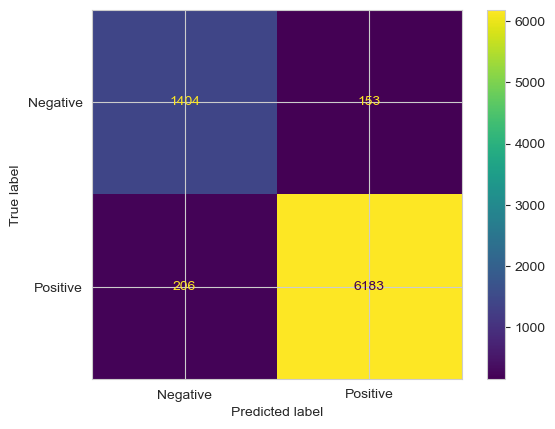

In [56]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

In [57]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(rfc.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(rfc.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 95.48 %


## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
# Evaluate the classifier on the testing set
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8173923986911653


In [61]:
#Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 81.74 %


In [62]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.93      0.07      0.14      1557
    Positive       0.82      1.00      0.90      6389

    accuracy                           0.82      7946
   macro avg       0.87      0.54      0.52      7946
weighted avg       0.84      0.82      0.75      7946



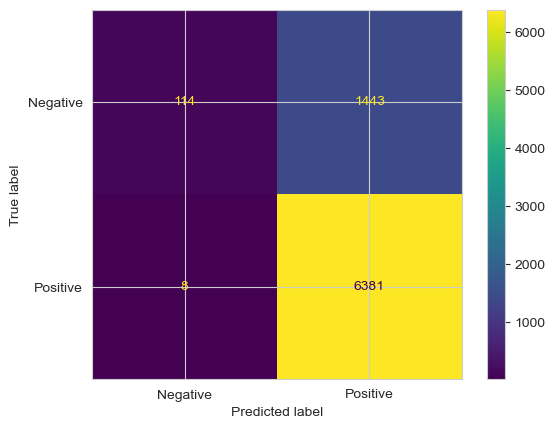

In [63]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [64]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(knn.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(knn.score(X_test, y_test)*100,2),'%')

The training score is 81.33 %
The testing score is 81.74 %


## Naive Bayes

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [67]:
nb_pred = nb.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, nb_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8274603574125347


In [69]:
# Create a classification report
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.99      0.12      0.22      1557
    Positive       0.82      1.00      0.90      6389

    accuracy                           0.83      7946
   macro avg       0.91      0.56      0.56      7946
weighted avg       0.86      0.83      0.77      7946



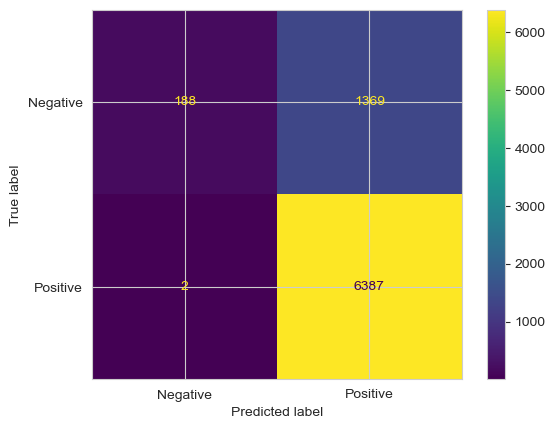

In [70]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

In [71]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(nb.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(nb.score(X_test, y_test)*100,2),'%')

The training score is 84.3 %
The testing score is 82.75 %


## Accuracy Comparison Of Different Models

In [72]:
print("Performance of various ML models: \n")
print('The accuracy of the Decision Tree Classifier is',round(accuracy_score(dtc.predict(X_test), y_test)*100,2),'%')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(rfc.predict(X_test), y_test)*100,2),'%')
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')
print('The accuracy of the Naive Bayes is',round(accuracy_score(nb.predict(X_test), y_test)*100,2),'%')

Performance of various ML models: 

The accuracy of the Decision Tree Classifier is 94.64 %
The accuracy of the Random Forest Classifier is 95.48 %
The accuracy of the KNN Classifier is 81.74 %
The accuracy of the Naive Bayes is 82.75 %


In [73]:
import joblib

# Save the trained model
joblib.dump(rfc, "depression_model.joblib")

['depression_model.joblib']

In [ ]:
import gradio as gr
import joblib
import pandas as pd

# Load the model
model = joblib.load("depression_model.joblib")

# Define the prediction function
def predict_fake_review():
    # Handling missing values
    if reviewer_id == '' or product_id == '' or pd.isnull(rating):
        return "Missing values. Please provide all inputs."
    
    # Initialize and fit the label encoder for ReviewerID and ProductID
    reviewer_encoder = LabelEncoder()
    product_encoder = LabelEncoder()
    reviewer_encoder.fit(df['ReviewerID'])
    product_encoder.fit(df['ProductID'])
    
    # Encode the input reviewer_id and product_id
    encoded_reviewer_id = reviewer_encoder.transform([reviewer_id])[0]
    encoded_product_id = product_encoder.transform([product_id])[0]
    
    # Prepare features for prediction
    features = [[encoded_reviewer_id, encoded_product_id, rating]]
    
    # Make prediction
    prediction = model.predict(features)

    print("Prediction:", prediction, type(prediction))  # Add this line for debugging
    
    # Check if the prediction array contains only one element
    if len(prediction) == 1:
        return "Not De" if prediction[0].strip().lower() == "" else "Fake"
    else:
        return "Error: Multiple predictions returned"

# Create Gradio interface
iface = gr.Interface(predict_fake_review, 
                     inputs=["text", "text", "number"], 
                     outputs="text",
                     title="Review Authenticity Predictor",
                     description="Enter Reviewer ID, Product ID, and Rating to predict review authenticity.")

# Launch the interface
iface.launch()

# Testing Data

In [74]:
df_test = pd.read_csv("Testing_Dataset.csv")
df_test.head()

,Unnamed: 0,target,TweetText
0,630681,0,studying for socials provy and doesnt get shi...
1,1190995,4,"watching investigations, with my twin sissy an..."
2,1169372,4,Sunbathing i refuse to get sunburned today.
3,1121636,4,@irulo now that's what I call a dream!
4,1322463,4,ÐÐ½Ð°ÐºÐ¾Ð¼Ð°Ñ? Ð´ÐµÐ²ÑÑÐºÐ° Ð¿Ð¾Ð´Ñ Ð¾Ð´Ð¸...


In [75]:
df_test.shape

(15953, 3)

In [76]:
df_test.describe()

,Unnamed: 0,target
count,1.595300e+04,15953.000000
mean,7.183152e+05,1.594684
std,4.531350e+05,1.958561
min,6.700000e+01,0.000000
25%,3.331530e+05,0.000000
50%,6.656990e+05,0.000000
75%,1.095263e+06,4.000000
max,1.599938e+06,4.000000


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15953 entries, 0 to 15952
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15953 non-null  int64 
 1   target      15953 non-null  int64 
 2   TweetText   15953 non-null  object
dtypes: int64(2), object(1)
memory usage: 374.0+ KB


In [78]:
df_test.isnull().sum()

Unnamed: 0    0
target        0
TweetText     0
dtype: int64

In [79]:
df_test['TweetText'].dtype

dtype('O')

In [80]:
df_test['target'].value_counts()

0    9593
4    6360
Name: target, dtype: int64

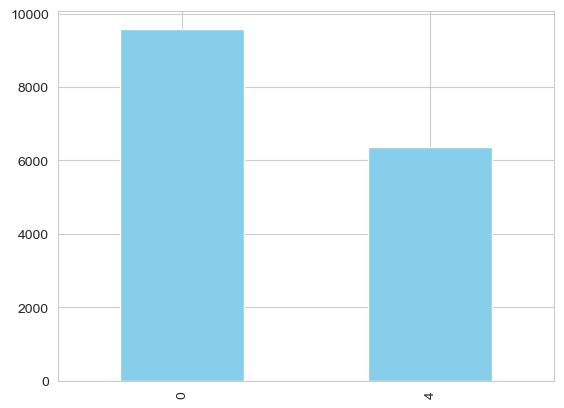

In [81]:
df_test.target.value_counts().plot(kind="bar", color="skyblue")
plt.show()

## Sentiment Analysis

In [82]:
# Removing Twitter Handles (@user)
df_test['TweetText'] = df_test['TweetText'].str.replace("@", "") 
# Removing links
df_test['TweetText'] = df_test['TweetText'].str.replace(r"http\S+", "") 
# Removing Punctuations, Numbers, and Special Characters
df_test['TweetText'] = df_test['TweetText'].str.replace("[^a-zA-Z]", " ") 

In [83]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [84]:
df_test['TweetText'] = df_test['TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df_test.head()

,Unnamed: 0,target,TweetText
0,630681,0,studying socials provy doesnt get shiiit stupi...
1,1190995,4,watching investigations twin sissy doggy
2,1169372,4,sunbathing refuse get sunburned today
3,1121636,4,irulo call dream
4,1322463,4,quot quot make


In [85]:
df_test['TweetText'] = df_test['TweetText'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)
df_test['TweetText'] = df_test['TweetText'].apply(nltk.word_tokenize)

In [86]:
df_test.head()

,Unnamed: 0,target,TweetText
0,630681,0,"[studying, socials, provy, doesnt, get, shiiit..."
1,1190995,4,"[watching, investigations, twin, sissy, doggy]"
2,1169372,4,"[sunbathing, refuse, get, sunburned, today]"
3,1121636,4,"[irulo, call, dream]"
4,1322463,4,"[quot, quot, make]"


In [87]:
# Now let’s stitch these tokens back together
df['TweetText'] = df['TweetText'].apply(lambda x: ' '.join([w for w in x]))
# Removing small words
df['TweetText'] = df['TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,ï»¿,target,TweetText,tokens
0,541200,0,,"[nkluvr, poor, little, dumpling, holmdel, vids..."
1,750,0,,"[wake, hella, early, tomorrow, morning]"
2,766711,0,,"[havent, able, listen, speakers, busted]"
3,285055,0,,"[remembers, solving, relatively, equation, unk..."
4,705995,0,,"[much, feel, sick]"


In [88]:
df_test["TweetText"] = df_test["TweetText"].apply(lambda x: ' '.join([Word(token).lemmatize() for token in x]))

In [89]:
df_test["tokens"] = df_test["TweetText"].apply(lambda x: TextBlob(x).words)

In [90]:
df_test.head()

,Unnamed: 0,target,TweetText,tokens
0,630681,0,studying social provy doesnt get shiiit stupid...,"[studying, social, provy, doesnt, get, shiiit,..."
1,1190995,4,watching investigation twin sissy doggy,"[watching, investigation, twin, sissy, doggy]"
2,1169372,4,sunbathing refuse get sunburned today,"[sunbathing, refuse, get, sunburned, today]"
3,1121636,4,irulo call dream,"[irulo, call, dream]"
4,1322463,4,quot quot make,"[quot, quot, make]"


In [91]:
# Applying sentiment to entire dataset
blob_emptylist = []

for i in df_test["TweetText"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [92]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df_test1 = pd.DataFrame(blob_emptylist)
df_test1.head()

,polarity,subjectivity
0,-0.383333,0.533333
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000


In [93]:
# Combine both data1 and df1
df_test3 = pd.concat([df_test.reset_index(drop=True), df_test1], axis=1)
df_test3.head()

,Unnamed: 0,target,TweetText,tokens,polarity,subjectivity
0,630681,0,studying social provy doesnt get shiiit stupid...,"[studying, social, provy, doesnt, get, shiiit,...",-0.383333,0.533333
1,1190995,4,watching investigation twin sissy doggy,"[watching, investigation, twin, sissy, doggy]",0.000000,0.000000
2,1169372,4,sunbathing refuse get sunburned today,"[sunbathing, refuse, get, sunburned, today]",0.000000,0.000000
3,1121636,4,irulo call dream,"[irulo, call, dream]",0.000000,0.000000
4,1322463,4,quot quot make,"[quot, quot, make]",0.000000,0.000000


In [94]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df_test4 = df_test3[['TweetText','tokens','polarity']]
df_test4.head()

,TweetText,tokens,polarity
0,studying social provy doesnt get shiiit stupid...,"[studying, social, provy, doesnt, get, shiiit,...",-0.383333
1,watching investigation twin sissy doggy,"[watching, investigation, twin, sissy, doggy]",0.000000
2,sunbathing refuse get sunburned today,"[sunbathing, refuse, get, sunburned, today]",0.000000
3,irulo call dream,"[irulo, call, dream]",0.000000
4,quot quot make,"[quot, quot, make]",0.000000


In [95]:
# Sentiment value
df_test4["Sentiment"] =  np.where(df_test4["polarity"] >= 0 , "Positive", "Negative")
df_test4.head()

,TweetText,tokens,polarity,Sentiment
0,studying social provy doesnt get shiiit stupid...,"[studying, social, provy, doesnt, get, shiiit,...",-0.383333,Negative
1,watching investigation twin sissy doggy,"[watching, investigation, twin, sissy, doggy]",0.000000,Positive
2,sunbathing refuse get sunburned today,"[sunbathing, refuse, get, sunburned, today]",0.000000,Positive
3,irulo call dream,"[irulo, call, dream]",0.000000,Positive
4,quot quot make,"[quot, quot, make]",0.000000,Positive


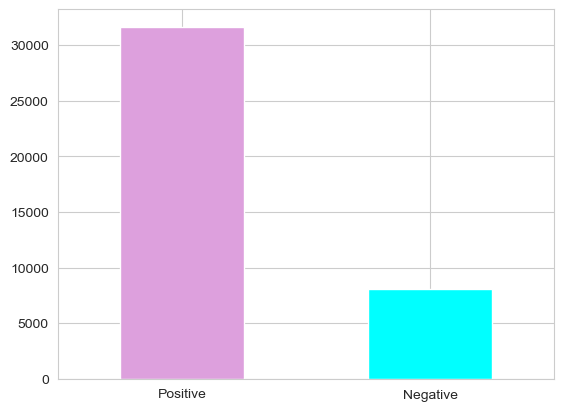

In [96]:
test_result = df_test4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [97]:
df_test4.groupby("Sentiment").count()

,TweetText,tokens,polarity
Sentiment,,,
Negative,3461,3461,3461
Positive,12492,12492,12492


In [98]:
df_test4.groupby("polarity").max().head() 
# returns the tweets with maximum polarity i.e. most negative tweets

,TweetText,tokens,Sentiment
polarity,,,
-1.000,worst week cancelled,"[worst, week, cancelled]",Negative
-0.900,today learned hate sam adam beer stuff nasty,"[today, learned, hate, sam, adam, beer, stuff,...",Negative
-0.875,upset everyting need find brutal deathcore band,"[upset, everyting, need, find, brutal, deathco...",Negative
-0.850,celinehlbk yeah awful cant even describe could...,"[celinehlbk, yeah, awful, cant, even, describe...",Negative
-0.850,omg got worst sunburn yesterday hole front bod...,"[omg, got, worst, sunburn, yesterday, hole, fr...",Negative


Text(0.5, 1.0, 'Polarity Distribution')

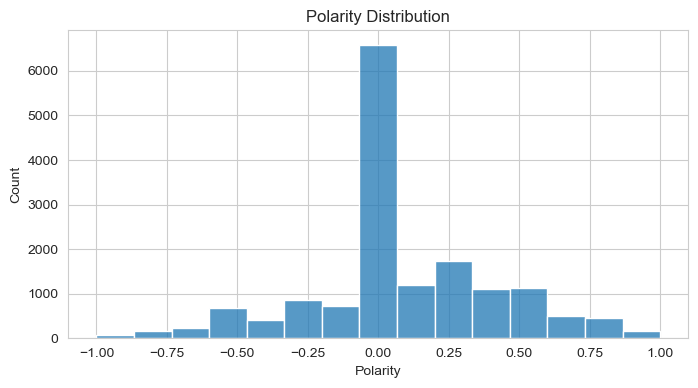

In [99]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df_test4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

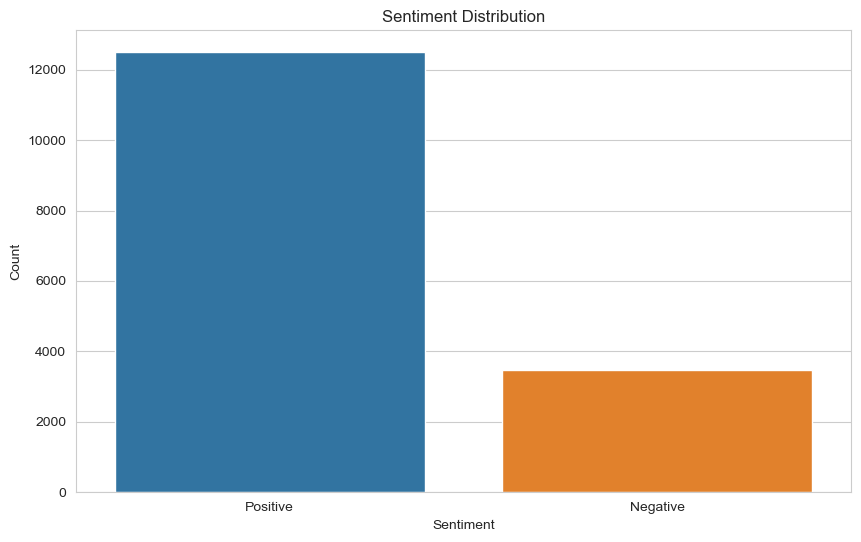

In [100]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df_test4,order=df_test4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [101]:
# check to see if data is balanced
df_test4['Sentiment'].value_counts()

Positive    12492
Negative     3461
Name: Sentiment, dtype: int64

## Train Test Split

In [102]:
# Load your trained model
model = joblib.load('depression_model.joblib') 

In [103]:
# Fit the TF-IDF vectorizer on the training data
tfidf_vectorizer.fit(df4['TweetText'])

# Transform both the training and unseen data
X = tfidf_vectorizer.fit_transform(df4['TweetText'])
X_unseen_transformed = tfidf_vectorizer.transform(df_test4['TweetText'])
Y_unseen_true = df_test4['Sentiment']

# Now you can use your trained model to make predictions on the transformed unseen data
Y_unseen_pred = model.predict(X_unseen_transformed)

# Evaluate the accuracy of your model on the unseen data
accuracy_unseen = accuracy_score(Y_unseen_true, Y_unseen_pred) * 100
print("Accuracy on unseen data:", accuracy_unseen)

Accuracy on unseen data: 91.43734720742181


In [104]:
# Create a classification report
print(classification_report(Y_unseen_true, Y_unseen_pred))

              precision    recall  f1-score   support

    Negative       0.82      0.78      0.80      3461
    Positive       0.94      0.95      0.95     12492

    accuracy                           0.91     15953
   macro avg       0.88      0.86      0.87     15953
weighted avg       0.91      0.91      0.91     15953



In [105]:
confusion_matrix(Y_unseen_true, Y_unseen_pred)

array([[ 2689,   772],
       [  594, 11898]], dtype=int64)

In [106]:
print("Performance of ML model On Testing Data: \n")
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(Y_unseen_true, Y_unseen_pred)*100,2),'%')

Performance of ML model On Testing Data: 

The accuracy of the Random Forest Classifier is 91.44 %
